# **Workout Recommender**

In [67]:
# little helpful tricks 
%load_ext autoreload
%autoreload 2 
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import seaborn as sns
import csv
import cleaner

### **Data Cleaning**

In [69]:
mgd = "megaGymDataset.csv"
wd = "workout-data.csv"
api_e_en = 'fixed_api_exercises_en.csv'

In [70]:
workouts_1 = cleaner.read_csv(mgd)
workouts_2 = cleaner.read_csv(wd)
workouts_3 = cleaner.read_csv(api_e_en)

In [71]:
cleaner.col_low(workouts_1)
cleaner.col_low(workouts_2)

In [72]:
workouts_1

,unnamed: 0,title,desc,type,bodypart,equipment,level,rating,ratingdesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2913,2913,EZ-bar skullcrusher-,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,8.1,Average
2914,2914,Lying Close-Grip Barbell Triceps Press To Chin,NaN,Strength,Triceps,E-Z Curl Bar,Beginner,8.1,Average
2915,2915,EZ-Bar Skullcrusher - Gethin Variation,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN
2916,2916,TBS Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN


In [73]:
workouts_1.info(), cleaner.col_info(workouts_1, 'bodypart');

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unnamed: 0  2918 non-null   int64  
 1   title       2918 non-null   object 
 2   desc        1368 non-null   object 
 3   type        2918 non-null   object 
 4   bodypart    2918 non-null   object 
 5   equipment   2886 non-null   object 
 6   level       2918 non-null   object 
 7   rating      1031 non-null   float64
 8   ratingdesc  862 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 205.3+ KB

Unique:
 ['Abdominals' 'Adductors' 'Abductors' 'Biceps' 'Calves' 'Chest' 'Forearms'
 'Glutes' 'Hamstrings' 'Lats' 'Lower Back' 'Middle Back' 'Traps' 'Neck'
 'Quadriceps' 'Shoulders' 'Triceps']

Describe:
 count           2918
unique            17
top       Abdominals
freq             662
Name: bodypart, dtype: object

Value Counts:
 bodypart
Abdominals     662
Quadriceps     

In [74]:
cleaner.dup_nul(workouts_1)

Duplicate Rows: 0
Null Values:
unnamed: 0       0
title            0
desc          1550
type             0
bodypart         0
equipment       32
level            0
rating        1887
ratingdesc    2056
dtype: int64


In [75]:
workouts_2

,id,exercise_name,videourl,steps,category,difficulty,force,grips,target,youtubeurl,details,aka
0,0,Barbell Curl,['https://media.musclewiki.com/media/uploads/v...,"['While holding the upper arms stationary, cur...",Barbell,Beginner,Pull,Underhand,{'Primary': ['Biceps']},https://www.youtube.com/embed/PGW-SgbEfGU,\n**Detailed How To:**- Grab the barbell with ...,NaN
1,1,Dumbbell Curl,['https://media.musclewiki.com/media/uploads/v...,"[""Stand up straight with a dumbbell in each ha...",Dumbbells,Beginner,Pull,Underhand,{'Primary': ['Biceps']},https://www.youtube.com/embed/P1FqV-oFn5M,\nHow To Perform the Dumbbell Bicep CurlSetupG...,NaN
2,2,Dumbbell Hammer Curl,['https://media.musclewiki.com/media/uploads/v...,['Hold the dumbbells with a neutral grip (thum...,Dumbbells,Beginner,Pull,Neutral,{'Primary': ['Biceps']},https://www.youtube.com/embed/tvRlfjjH5NA,NaN,NaN
3,3,Kettlebell Goblet Curl,['https://media.musclewiki.com/media/uploads/v...,['Stand up straight with a kettlebell in both ...,Kettlebells,Beginner,NaN,NaN,{'Primary': ['Biceps']},NaN,NaN,NaN
4,4,Kettlebell Concentration Curl,['https://media.musclewiki.com/media/uploads/v...,"['Sitting on a chair with your legs apart, res...",Kettlebells,Intermediate,Pull,Underhand,{'Primary': ['Biceps']},NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
949,949,Gate Pose Variation Arm Extended on Side,['https://media.musclewiki.com/media/uploads/v...,['Start on your knees and extend your right le...,Yoga,Intermediate,Hold,NaN,"{'Primary': ['Obliques'], 'Secondary': ['Lats']}",NaN,NaN,Parighasana
950,950,Revolved Head To Knee,['https://media.musclewiki.com/media/uploads/v...,['Sit on the floor with your legs extended in ...,Yoga,Advanced,Hold,NaN,"{'Primary': ['Obliques'], 'Secondary': ['Hamst...",NaN,NaN,Parivritta Janu Sirsasana
951,951,Seated Side Bend Pose,['https://media.musclewiki.com/media/uploads/v...,['Sit comfortably on the floor with your legs ...,Yoga,Beginner,Hold,NaN,{'Primary': ['Obliques']},NaN,NaN,Parsva Sukhansana
952,952,Supine Twist Lying,['https://media.musclewiki.com/media/uploads/v...,['Lie down on your back with your arms stretch...,Yoga,Beginner,Hold,NaN,"{'Primary': ['Obliques'], 'Secondary': ['Lower...",NaN,NaN,Supta Matsyendrasana


In [76]:
col_order = ['id', 'exercise_name', 'aka', 'category', 'force', 'grips', 'target', 'difficulty', 'details', 'steps', 'youtubeurl', 'videourl']

workouts_2 = cleaner.col_order(workouts_2, col_order)

In [77]:
workouts_2.info(), cleaner.col_info(workouts_2, 'category');

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             954 non-null    int64 
 1   exercise_name  954 non-null    object
 2   aka            60 non-null     object
 3   category       954 non-null    object
 4   force          659 non-null    object
 5   grips          538 non-null    object
 6   target         954 non-null    object
 7   difficulty     946 non-null    object
 8   details        73 non-null     object
 9   steps          954 non-null    object
 10  youtubeurl     113 non-null    object
 11  videourl       954 non-null    object
dtypes: int64(1), object(11)
memory usage: 89.6+ KB

Unique:
 ['Barbell' 'Dumbbells' 'Kettlebells' 'Stretches' 'Cables' 'Band' 'Plate'
 'TRX' 'Bodyweight' 'Yoga' 'Machine' 'MedicineBall']

Describe:
 count           954
unique           12
top       Dumbbells
freq            252
Name: categor

In [78]:
cleaner.dup_nul(workouts_2)

Duplicate Rows: 0
Null Values:
id                 0
exercise_name      0
aka              894
category           0
force            295
grips            416
target             0
difficulty         8
details          881
steps              0
youtubeurl       841
videourl           0
dtype: int64


In [82]:
workouts_3

,id,uuid,name,exercise_base,description,created,category,muscles,muscles_secondary,equipment,language,license,license_author,variations,author_history
0,345,c788d643-150a-4ac7-97ef-84643c6419bf,2 Handed Kettlebell Swing,9,<p>Two Handed Russian Style Kettlebell swing</p>,2023-08-06T10:17:17.349574+02:00,Abs,[],[],['Kettlebell'],2,2,deusinvictus,"[249, 345]",['deusinvictus']
1,2078,bece2c5e-aadc-4d20-bde2-64b5b53f53f0,3D lunge warmup,1115,"As a warmup, use light dumbbells, one in each ...",2023-08-06T10:17:17.349574+02:00,Cardio,[],[],['Dumbbell'],2,2,philip,[],['philip']
2,1728,ac741b46-6d5f-4f33-89b3-7930fa9bac6a,4-count Burpe,997,"<p> Initial position: </p> <p> Stand upright, ...",2023-08-06T10:17:17.349574+02:00,Chest,[],[],['none (bodyweight exercise)'],23,2,NaN,[],"['Reza Almanda (imported from Feeel)', 'mondst..."
3,1731,66fe654d-3379-46e8-95dc-23e3ce56f25c,4-count burpees,997,"<p>Starting position:</p><p>Stand straight, fe...",2023-08-06T10:17:17.349574+02:00,Chest,[],[],['none (bodyweight exercise)'],2,2,NaN,[],"['Miroslav Mazel (imported from Feeel)', 'mond..."
4,1734,8b52efb2-52cb-4301-9a2c-c5a8570e3519,4-tel burpees,997,<p> Starting position: </p> <p> Stand straight...,2023-08-06T10:17:17.349574+02:00,Chest,[],[],['none (bodyweight exercise)'],6,2,NaN,[],"['Daan Vervacke (imported from Feeel)', 'J. La..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,1639,ba63e9a7-5c3a-4da7-a146-60b0c0ea0444,Kneeling and bend your knees and lift your legs,990,<p> Starting posture: limbs to the ground.</p>...,2023-08-06T10:17:17.349574+02:00,Legs,[],[],['none (bodyweight exercise)'],24,2,NaN,[],"['bxezi (imported from Feeel)', 'Eric (importe..."
1384,1338,663bc4e9-907e-4dea-a750-5a11f8270c7d,Hopping bamboo,320,<p> Starting posture: Standing together on bot...,2023-08-06T10:17:17.349574+02:00,Legs,['Quadriceps femoris'],[],[],24,2,student1234,[],"['bxezi (imported from Feeel)', 'student1234',..."
1385,1856,cef80251-e831-4147-8cae-69d49b5e5da3,Turn around,1007,"<p> Starting posture: sitting or standing, the...",2023-08-06T10:17:17.349574+02:00,Shoulders,[],[],['none (bodyweight exercise)'],24,2,NaN,[],"['bxezi (imported from Feeel)', 'Eric (importe..."
1386,1787,ad28069b-6deb-4a1b-b659-3a78deab9e40,High -level flat support,1001,<p> Starting posture: Start high flat flat sup...,2023-08-06T10:17:17.349574+02:00,Chest,[],[],['none (bodyweight exercise)'],24,2,NaN,"[1787, 1934, 1412, 1434]","['bxezi (imported from Feeel)', 'Eric (importe..."


In [81]:
workouts_3.info(), cleaner.col_info(workouts_3, 'muscles_secondary')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 1388 non-null   int64 
 1   uuid               1388 non-null   object
 2   name               1388 non-null   object
 3   exercise_base      1388 non-null   int64 
 4   description        1256 non-null   object
 5   created            1388 non-null   object
 6   category           1388 non-null   object
 7   muscles            1388 non-null   object
 8   muscles_secondary  1388 non-null   object
 9   equipment          1388 non-null   object
 10  language           1388 non-null   int64 
 11  license            1388 non-null   int64 
 12  license_author     911 non-null    object
 13  variations         1388 non-null   object
 14  author_history     1388 non-null   object
dtypes: int64(4), object(11)
memory usage: 162.8+ KB

Unique:
 ['[]' "['Serratus anterior']" "

(None, None)

In [83]:
workouts_1.columns

Index(['unnamed: 0', 'title', 'desc', 'type', 'bodypart', 'equipment', 'level',
       'rating', 'ratingdesc'],
      dtype='object')

In [84]:
workouts_2.columns

Index(['id', 'exercise_name', 'aka', 'category', 'force', 'grips', 'target',
       'difficulty', 'details', 'steps', 'youtubeurl', 'videourl'],
      dtype='object')

In [85]:
workouts_3.columns

Index(['id', 'uuid', 'name', 'exercise_base', 'description', 'created',
       'category', 'muscles', 'muscles_secondary', 'equipment', 'language',
       'license', 'license_author', 'variations', 'author_history'],
      dtype='object')

I have 3 data sets, i need them to have the same columns. I need name, muscle group (ones used), category (cardio, strength, etc), description, equipment, level, steps (if any), not in this order

In [91]:
workouts_2.columns


Index(['exercise_name', 'category', 'force', 'grips', 'target', 'difficulty',
       'details', 'steps', 'videourl'],
      dtype='object')

In [94]:
workouts_3.columns

Index(['id', 'uuid', 'name', 'exercise_base', 'description', 'created',
       'category', 'muscles', 'muscles_secondary', 'equipment', 'language',
       'license', 'license_author', 'variations', 'author_history'],
      dtype='object')

In [86]:
# dropping columns
drop_col_1 = ['unnamed: 0','rating', 'ratingdesc']
drop_col_2 = ['id', 'aka', 'youtubeurl']
drop_col_3 = ['id', 'uuid', 'exercise_base', 'created', 'language', 'license', 'license_author', 'variations', 'author_history']

cleaner.drop_col(workouts_1, drop_col_1)
cleaner.drop_col(workouts_2, drop_col_2)
cleaner.drop_col(workouts_3, drop_col_3)

In [87]:
# renaming columns
new_name_1 = ['name', 'description', 'category', 'muscle_group', 'equipment', 'level']
new_name_2 = ['name', 'equipment', 'force', 'grip', 'muscle_group', 'level', 'description', 'steps', 'video_link']
new_name_3 = ['name', 'description', 'muscle_group', 'm1', 'm2', 'equipment']

cleaner.new_col_name(workouts_1, new_name_1)
cleaner.new_col_name(workouts_2, new_name_2)
cleaner.new_col_name(workouts_3, new_name_3)

In [88]:
# changing the order of columns
order_1 = ['name', 'muscle_group', 'category', 'equipment', 'level', 'description']
order_2 = ['name', 'muscle_group', 'equipment', 'level', 'description', 'steps', 'grip', 'force', 'video_link']
order_3 = ['name', 'muscle_group', 'equipment', 'description', 'm1', 'm2']

workouts_1 = cleaner.col_order(workouts_1, order_1)
workouts_2 = cleaner.col_order(workouts_2, order_2)
workouts_3 = cleaner.col_order(workouts_3, order_3)

In [98]:
# filling nan values
cleaner.fill_nan(workouts_1, 'description', 'not available')

c:\Users\dylan\OneDrive\Documents\Dylans Doc's\Dylan's courses\2024 Courses\IronHack\Week 9\Final Project\Workout_Recommender_System\cleaner.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna(value, inplace=True)


,name,muscle_group,category,equipment,level,description
0,Partner plank band row,Abdominals,Strength,Bands,Intermediate,The partner plank band row is an abdominal exe...
1,Banded crunch isometric hold,Abdominals,Strength,Bands,Intermediate,The banded crunch isometric hold is an exercis...
2,FYR Banded Plank Jack,Abdominals,Strength,Bands,Intermediate,The banded plank jack is a variation on the pl...
3,Banded crunch,Abdominals,Strength,Bands,Intermediate,The banded crunch is an exercise targeting the...
4,Crunch,Abdominals,Strength,Bands,Intermediate,The crunch is a popular core exercise targetin...
...,...,...,...,...,...,...
2913,EZ-bar skullcrusher-,Triceps,Strength,E-Z Curl Bar,Intermediate,The EZ-bar skullcrusher is a popular exercise ...
2914,Lying Close-Grip Barbell Triceps Press To Chin,Triceps,Strength,E-Z Curl Bar,Beginner,not available
2915,EZ-Bar Skullcrusher - Gethin Variation,Triceps,Strength,E-Z Curl Bar,Intermediate,The EZ-bar skullcrusher is a popular exercise ...
2916,TBS Skullcrusher,Triceps,Strength,E-Z Curl Bar,Intermediate,The EZ-bar skullcrusher is a popular exercise ...


In [99]:
#checking for duplicated rows and null values
cleaner.dup_nul(workouts_1)

Duplicate Rows: 9
Null Values:
name             0
muscle_group     0
category         0
equipment       32
level            0
description      0
dtype: int64


In [101]:
# dropping duplicated rows
cleaner.drop_dup(workouts_1)

c:\Users\dylan\OneDrive\Documents\Dylans Doc's\Dylan's courses\2024 Courses\IronHack\Week 9\Final Project\Workout_Recommender_System\cleaner.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [102]:
# filling nan values for second data set
cleaner.fill_nan(workouts_2, 'video_link', 'not available')
cleaner.fill_nan(workouts_2, 'description', 'not available')


,name,muscle_group,equipment,level,description,steps,grip,force,video_link
0,Barbell Curl,{'Primary': ['Biceps']},Barbell,Beginner,\n**Detailed How To:**- Grab the barbell with ...,"['While holding the upper arms stationary, cur...",Underhand,Pull,['https://media.musclewiki.com/media/uploads/v...
1,Dumbbell Curl,{'Primary': ['Biceps']},Dumbbells,Beginner,\nHow To Perform the Dumbbell Bicep CurlSetupG...,"[""Stand up straight with a dumbbell in each ha...",Underhand,Pull,['https://media.musclewiki.com/media/uploads/v...
2,Dumbbell Hammer Curl,{'Primary': ['Biceps']},Dumbbells,Beginner,not available,['Hold the dumbbells with a neutral grip (thum...,Neutral,Pull,['https://media.musclewiki.com/media/uploads/v...
3,Kettlebell Goblet Curl,{'Primary': ['Biceps']},Kettlebells,Beginner,not available,['Stand up straight with a kettlebell in both ...,NaN,NaN,['https://media.musclewiki.com/media/uploads/v...
4,Kettlebell Concentration Curl,{'Primary': ['Biceps']},Kettlebells,Intermediate,not available,"['Sitting on a chair with your legs apart, res...",Underhand,Pull,['https://media.musclewiki.com/media/uploads/v...
...,...,...,...,...,...,...,...,...,...
949,Gate Pose Variation Arm Extended on Side,"{'Primary': ['Obliques'], 'Secondary': ['Lats']}",Yoga,Intermediate,not available,['Start on your knees and extend your right le...,NaN,Hold,['https://media.musclewiki.com/media/uploads/v...
950,Revolved Head To Knee,"{'Primary': ['Obliques'], 'Secondary': ['Hamst...",Yoga,Advanced,not available,['Sit on the floor with your legs extended in ...,NaN,Hold,['https://media.musclewiki.com/media/uploads/v...
951,Seated Side Bend Pose,{'Primary': ['Obliques']},Yoga,Beginner,not available,['Sit comfortably on the floor with your legs ...,NaN,Hold,['https://media.musclewiki.com/media/uploads/v...
952,Supine Twist Lying,"{'Primary': ['Obliques'], 'Secondary': ['Lower...",Yoga,Beginner,not available,['Lie down on your back with your arms stretch...,NaN,Hold,['https://media.musclewiki.com/media/uploads/v...


In [103]:
# removing specific characters from columns and removing specific words from columns
cleaner.clean_column(workouts_2, 'muscle_group', "{'[]}")

words_to_remove = ['Primary', 'Secondary']
word_remove = ['\n']

cleaner.remove_words(workouts_2, 'muscle_group', words_to_remove)
cleaner.remove_words(workouts_2, 'description', words_to_remove)
cleaner.clean_column(workouts_2, 'muscle_group', ":")
cleaner.clean_column(workouts_2, 'steps', "{'[]}")
cleaner.clean_column(workouts_2, 'video_link', "'[]")
cleaner.clean_column(workouts_2, 'steps', '"')
cleaner.clean_column(workouts_2, 'description', "*-")
cleaner.remove_words(workouts_2, 'description', ['\n'])


,name,muscle_group,equipment,level,description,steps,grip,force,video_link
0,Barbell Curl,Primary: Biceps,Barbell,Beginner,\n**Detailed How To:**- Grab the barbell with ...,"['While holding the upper arms stationary, cur...",Underhand,Pull,['https://media.musclewiki.com/media/uploads/v...
1,Dumbbell Curl,Primary: Biceps,Dumbbells,Beginner,\nHow To Perform the Dumbbell Bicep CurlSetupG...,"[""Stand up straight with a dumbbell in each ha...",Underhand,Pull,['https://media.musclewiki.com/media/uploads/v...
2,Dumbbell Hammer Curl,Primary: Biceps,Dumbbells,Beginner,not available,['Hold the dumbbells with a neutral grip (thum...,Neutral,Pull,['https://media.musclewiki.com/media/uploads/v...
3,Kettlebell Goblet Curl,Primary: Biceps,Kettlebells,Beginner,not available,['Stand up straight with a kettlebell in both ...,NaN,NaN,['https://media.musclewiki.com/media/uploads/v...
4,Kettlebell Concentration Curl,Primary: Biceps,Kettlebells,Intermediate,not available,"['Sitting on a chair with your legs apart, res...",Underhand,Pull,['https://media.musclewiki.com/media/uploads/v...
...,...,...,...,...,...,...,...,...,...
949,Gate Pose Variation Arm Extended on Side,"Primary: Obliques, Secondary: Lats",Yoga,Intermediate,not available,['Start on your knees and extend your right le...,NaN,Hold,['https://media.musclewiki.com/media/uploads/v...
950,Revolved Head To Knee,"Primary: Obliques, Secondary: Hamstrings",Yoga,Advanced,not available,['Sit on the floor with your legs extended in ...,NaN,Hold,['https://media.musclewiki.com/media/uploads/v...
951,Seated Side Bend Pose,Primary: Obliques,Yoga,Beginner,not available,['Sit comfortably on the floor with your legs ...,NaN,Hold,['https://media.musclewiki.com/media/uploads/v...
952,Supine Twist Lying,"Primary: Obliques, Secondary: Lower back",Yoga,Beginner,not available,['Lie down on your back with your arms stretch...,NaN,Hold,['https://media.musclewiki.com/media/uploads/v...


In [106]:
# function to add force depending if its biceps or triceps
def fix_force(df: pd.DataFrame, body_part: str, force: str):
    df[body_part] = df[body_part].str.strip()  # remove whitespace
    df[force] = np.where(df[body_part] == 'Biceps', 'Pull', 
                         np.where(df[body_part] == 'Triceps', 'Push', df[force]))
    return df

In [107]:
fix_force(workouts_2, 'muscle_group', 'force')

,name,muscle_group,equipment,level,description,steps,grip,force,video_link
0,Barbell Curl,Biceps,Barbell,Beginner,\nDetailed How To: Grab the barbell with a sho...,"While holding the upper arms stationary, curl ...",Underhand,Pull,https://media.musclewiki.com/media/uploads/vid...
1,Dumbbell Curl,Biceps,Dumbbells,Beginner,\nHow To Perform the Dumbbell Bicep CurlSetupG...,Stand up straight with a dumbbell in each hand...,Underhand,Pull,https://media.musclewiki.com/media/uploads/vid...
2,Dumbbell Hammer Curl,Biceps,Dumbbells,Beginner,not available,Hold the dumbbells with a neutral grip (thumbs...,Neutral,Pull,https://media.musclewiki.com/media/uploads/vid...
3,Kettlebell Goblet Curl,Biceps,Kettlebells,Beginner,not available,Stand up straight with a kettlebell in both ha...,NaN,Pull,https://media.musclewiki.com/media/uploads/vid...
4,Kettlebell Concentration Curl,Biceps,Kettlebells,Intermediate,not available,"Sitting on a chair with your legs apart, rest ...",Underhand,Pull,https://media.musclewiki.com/media/uploads/vid...
...,...,...,...,...,...,...,...,...,...
949,Gate Pose Variation Arm Extended on Side,"Obliques, Lats",Yoga,Intermediate,not available,Start on your knees and extend your right leg ...,NaN,Hold,https://media.musclewiki.com/media/uploads/vid...
950,Revolved Head To Knee,"Obliques, Hamstrings",Yoga,Advanced,not available,Sit on the floor with your legs extended in fr...,NaN,Hold,https://media.musclewiki.com/media/uploads/vid...
951,Seated Side Bend Pose,Obliques,Yoga,Beginner,not available,Sit comfortably on the floor with your legs cr...,NaN,Hold,https://media.musclewiki.com/media/uploads/vid...
952,Supine Twist Lying,"Obliques, Lower back",Yoga,Beginner,not available,Lie down on your back with your arms stretched...,NaN,Hold,https://media.musclewiki.com/media/uploads/vid...


In [108]:
# filling nan values in specific columns with accurate an value
cleaner.fill_nan(workouts_2, 'force', value='Unknown')
cleaner.fill_nan(workouts_2, 'grip', value='N/A')

,name,muscle_group,equipment,level,description,steps,grip,force,video_link
0,Barbell Curl,Biceps,Barbell,Beginner,\nDetailed How To: Grab the barbell with a sho...,"While holding the upper arms stationary, curl ...",Underhand,Pull,https://media.musclewiki.com/media/uploads/vid...
1,Dumbbell Curl,Biceps,Dumbbells,Beginner,\nHow To Perform the Dumbbell Bicep CurlSetupG...,Stand up straight with a dumbbell in each hand...,Underhand,Pull,https://media.musclewiki.com/media/uploads/vid...
2,Dumbbell Hammer Curl,Biceps,Dumbbells,Beginner,not available,Hold the dumbbells with a neutral grip (thumbs...,Neutral,Pull,https://media.musclewiki.com/media/uploads/vid...
3,Kettlebell Goblet Curl,Biceps,Kettlebells,Beginner,not available,Stand up straight with a kettlebell in both ha...,N/A,Pull,https://media.musclewiki.com/media/uploads/vid...
4,Kettlebell Concentration Curl,Biceps,Kettlebells,Intermediate,not available,"Sitting on a chair with your legs apart, rest ...",Underhand,Pull,https://media.musclewiki.com/media/uploads/vid...
...,...,...,...,...,...,...,...,...,...
949,Gate Pose Variation Arm Extended on Side,"Obliques, Lats",Yoga,Intermediate,not available,Start on your knees and extend your right leg ...,N/A,Hold,https://media.musclewiki.com/media/uploads/vid...
950,Revolved Head To Knee,"Obliques, Hamstrings",Yoga,Advanced,not available,Sit on the floor with your legs extended in fr...,N/A,Hold,https://media.musclewiki.com/media/uploads/vid...
951,Seated Side Bend Pose,Obliques,Yoga,Beginner,not available,Sit comfortably on the floor with your legs cr...,N/A,Hold,https://media.musclewiki.com/media/uploads/vid...
952,Supine Twist Lying,"Obliques, Lower back",Yoga,Beginner,not available,Lie down on your back with your arms stretched...,N/A,Hold,https://media.musclewiki.com/media/uploads/vid...


In [109]:
#identifying duplicates
cleaner.dup_nul(workouts_2)

Duplicate Rows: 314
Null Values:
name            0
muscle_group    0
equipment       0
level           8
description     0
steps           0
grip            0
force           0
video_link      0
dtype: int64


In [110]:
# deleting duplicates from specific column
cleaner.drop_dup_col(workouts_2, 'name')

workouts_2


In [112]:
workouts_3

,name,muscle_group,equipment,description,m1,m2
0,2 Handed Kettlebell Swing,Abs,['Kettlebell'],<p>Two Handed Russian Style Kettlebell swing</p>,[],[]
1,3D lunge warmup,Cardio,['Dumbbell'],"As a warmup, use light dumbbells, one in each ...",[],[]
2,4-count Burpe,Chest,['none (bodyweight exercise)'],"<p> Initial position: </p> <p> Stand upright, ...",[],[]
3,4-count burpees,Chest,['none (bodyweight exercise)'],"<p>Starting position:</p><p>Stand straight, fe...",[],[]
4,4-tel burpees,Chest,['none (bodyweight exercise)'],<p> Starting position: </p> <p> Stand straight...,[],[]
...,...,...,...,...,...,...
1383,Kneeling and bend your knees and lift your legs,Legs,['none (bodyweight exercise)'],<p> Starting posture: limbs to the ground.</p>...,[],[]
1384,Hopping bamboo,Legs,[],<p> Starting posture: Standing together on bot...,['Quadriceps femoris'],[]
1385,Turn around,Shoulders,['none (bodyweight exercise)'],"<p> Starting posture: sitting or standing, the...",[],[]
1386,High -level flat support,Chest,['none (bodyweight exercise)'],<p> Starting posture: Start high flat flat sup...,[],[]


In [113]:
# dropping unwanted columns
col_drop_3 = ['m1', 'm2']

cleaner.drop_col(workouts_3, col_drop_3)

c:\Users\dylan\OneDrive\Documents\Dylans Doc's\Dylan's courses\2024 Courses\IronHack\Week 9\Final Project\Workout_Recommender_System\cleaner.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns_to_drop, axis=1, inplace=True)


In [115]:
# removing certain characters and words from columns for third data set
cleaner.clean_column(workouts_3, 'equipment', "'[]")
cleaner.remove_words(workouts_3, 'description', ['<p>', '</p>'])
cleaner.remove_words(workouts_3, 'equipment', ['none'])
cleaner.clean_column(workouts_3, 'equipment', "()")
cleaner.clean_column(workouts_3, 'description', "<>")
cleaner.fill_nan(workouts_3, 'description', 'Unavailable')
cleaner.replace_val(workouts_3, 'equipment', "", 'Unavailable')


c:\Users\dylan\OneDrive\Documents\Dylans Doc's\Dylan's courses\2024 Courses\IronHack\Week 9\Final Project\Workout_Recommender_System\cleaner.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.translate(chars_to_remove)
c:\Users\dylan\OneDrive\Documents\Dylans Doc's\Dylan's courses\2024 Courses\IronHack\Week 9\Final Project\Workout_Recommender_System\cleaner.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.replace(pattern, '', regex=True)
c:\Users

,name,muscle_group,equipment,description
0,2 Handed Kettlebell Swing,Abs,Kettlebell,Two Handed Russian Style Kettlebell swing
1,3D lunge warmup,Cardio,Dumbbell,"As a warmup, use light dumbbells, one in each ..."
2,4-count Burpe,Chest,bodyweight exercise,"Initial position: Stand upright, feet as wi..."
3,4-count burpees,Chest,bodyweight exercise,"Starting position:Stand straight, feet hip-wid..."
4,4-tel burpees,Chest,bodyweight exercise,"Starting position: Stand straight, feet on ..."
...,...,...,...,...
1383,Kneeling and bend your knees and lift your legs,Legs,bodyweight exercise,Starting posture: limbs to the ground. Step:...
1384,Hopping bamboo,Legs,Unavailable,Starting posture: Standing together on both f...
1385,Turn around,Shoulders,bodyweight exercise,"Starting posture: sitting or standing, the ba..."
1386,High -level flat support,Chest,bodyweight exercise,Starting posture: Start high flat flat suppor...


In [116]:
# dropping duplicates in third dataset
cleaner.drop_dup(workouts_3)

c:\Users\dylan\OneDrive\Documents\Dylans Doc's\Dylan's courses\2024 Courses\IronHack\Week 9\Final Project\Workout_Recommender_System\cleaner.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


**Formatting Muscle Group column in all Datasets**

In [117]:
workouts_1

,name,muscle_group,category,equipment,level,description
0,Partner plank band row,Abdominals,Strength,Bands,Intermediate,The partner plank band row is an abdominal exe...
1,Banded crunch isometric hold,Abdominals,Strength,Bands,Intermediate,The banded crunch isometric hold is an exercis...
2,FYR Banded Plank Jack,Abdominals,Strength,Bands,Intermediate,The banded plank jack is a variation on the pl...
3,Banded crunch,Abdominals,Strength,Bands,Intermediate,The banded crunch is an exercise targeting the...
4,Crunch,Abdominals,Strength,Bands,Intermediate,The crunch is a popular core exercise targetin...
...,...,...,...,...,...,...
2913,EZ-bar skullcrusher-,Triceps,Strength,E-Z Curl Bar,Intermediate,The EZ-bar skullcrusher is a popular exercise ...
2914,Lying Close-Grip Barbell Triceps Press To Chin,Triceps,Strength,E-Z Curl Bar,Beginner,not available
2915,EZ-Bar Skullcrusher - Gethin Variation,Triceps,Strength,E-Z Curl Bar,Intermediate,The EZ-bar skullcrusher is a popular exercise ...
2916,TBS Skullcrusher,Triceps,Strength,E-Z Curl Bar,Intermediate,The EZ-bar skullcrusher is a popular exercise ...


In [118]:
cleaner.col_info(workouts_1, 'muscle_group')


Unique:
 ['Abdominals' 'Adductors' 'Abductors' 'Biceps' 'Calves' 'Chest' 'Forearms'
 'Glutes' 'Hamstrings' 'Lats' 'Lower Back' 'Middle Back' 'Traps' 'Neck'
 'Quadriceps' 'Shoulders' 'Triceps']

Describe:
 count           2909
unique            17
top       Abdominals
freq             660
Name: muscle_group, dtype: object

Value Counts:
 muscle_group
Abdominals     660
Quadriceps     645
Shoulders      338
Chest          260
Biceps         168
Triceps        151
Lats           124
Hamstrings     121
Middle Back    116
Lower Back      97
Glutes          81
Calves          47
Forearms        31
Traps           24
Abductors       21
Adductors       17
Neck             8
Name: count, dtype: int64


In [119]:
workouts_2

,name,muscle_group,equipment,level,description,steps,grip,force,video_link
0,Barbell Curl,Biceps,Barbell,Beginner,\nDetailed How To: Grab the barbell with a sho...,"While holding the upper arms stationary, curl ...",Underhand,Pull,https://media.musclewiki.com/media/uploads/vid...
1,Dumbbell Curl,Biceps,Dumbbells,Beginner,\nHow To Perform the Dumbbell Bicep CurlSetupG...,Stand up straight with a dumbbell in each hand...,Underhand,Pull,https://media.musclewiki.com/media/uploads/vid...
2,Dumbbell Hammer Curl,Biceps,Dumbbells,Beginner,not available,Hold the dumbbells with a neutral grip (thumbs...,Neutral,Pull,https://media.musclewiki.com/media/uploads/vid...
3,Kettlebell Goblet Curl,Biceps,Kettlebells,Beginner,not available,Stand up straight with a kettlebell in both ha...,N/A,Pull,https://media.musclewiki.com/media/uploads/vid...
4,Kettlebell Concentration Curl,Biceps,Kettlebells,Intermediate,not available,"Sitting on a chair with your legs apart, rest ...",Underhand,Pull,https://media.musclewiki.com/media/uploads/vid...
...,...,...,...,...,...,...,...,...,...
949,Gate Pose Variation Arm Extended on Side,"Obliques, Lats",Yoga,Intermediate,not available,Start on your knees and extend your right leg ...,N/A,Hold,https://media.musclewiki.com/media/uploads/vid...
950,Revolved Head To Knee,"Obliques, Hamstrings",Yoga,Advanced,not available,Sit on the floor with your legs extended in fr...,N/A,Hold,https://media.musclewiki.com/media/uploads/vid...
951,Seated Side Bend Pose,Obliques,Yoga,Beginner,not available,Sit comfortably on the floor with your legs cr...,N/A,Hold,https://media.musclewiki.com/media/uploads/vid...
952,Supine Twist Lying,"Obliques, Lower back",Yoga,Beginner,not available,Lie down on your back with your arms stretched...,N/A,Hold,https://media.musclewiki.com/media/uploads/vid...


In [120]:
cleaner.col_info(workouts_2, 'muscle_group')



Unique:
 ['Biceps' 'Biceps,  Forearms' 'Biceps, Forearms' 'Biceps,  Shoulders'
 'Biceps, Triceps,  Shoulders' 'Biceps,  Quads, Glutes'
 'Lats, Mid back,  Biceps, Tertiary Forearms'
 'Lats,  Biceps, Tertiary Forearms' 'Lats,  Biceps'
 'Lats,  Biceps, Tertiary Lower back' 'Lats, Lower back,  Biceps'
 'Forearms,  Lats, Tertiary Biceps' 'Biceps,  Hamstrings'
 'Biceps,  Forearms, Tertiary Hamstrings'
 'Biceps,  Chest, Tertiary Lower back'
 'Chest,  Triceps, Tertiary Shoulders' 'Chest'
 'Chest,  Triceps, Shoulders' 'Chest,  Triceps'
 'Chest,  Triceps, Tertiary Abdominals' 'Chest, Triceps'
 'Chest, Shoulders,  Triceps' 'Chest, Abdominals,  Quads, Tertiary Glutes'
 'Chest,  Glutes' 'Chest,  Lats, Tertiary Abdominals'
 'Chest,  Abdominals, Tertiary Quads' 'Chest,  Biceps, Tertiary Shoulders'
 'Chest,  Mid back' 'Quads,  Glutes' 'Quads'
 'Quads,  Glutes, Tertiary Lower back'
 'Quads,  Glutes, Tertiary Abdominals' 'Quads, Hamstrings,  Glutes'
 'Quads, Lower back,  Glutes' 'Quads,  Glutes, Tertia

In [121]:
workouts_3

,name,muscle_group,equipment,description
0,2 Handed Kettlebell Swing,Abs,Kettlebell,Two Handed Russian Style Kettlebell swing
1,3D lunge warmup,Cardio,Dumbbell,"As a warmup, use light dumbbells, one in each ..."
2,4-count Burpe,Chest,bodyweight exercise,"Initial position: Stand upright, feet as wi..."
3,4-count burpees,Chest,bodyweight exercise,"Starting position:Stand straight, feet hip-wid..."
4,4-tel burpees,Chest,bodyweight exercise,"Starting position: Stand straight, feet on ..."
...,...,...,...,...
1383,Kneeling and bend your knees and lift your legs,Legs,bodyweight exercise,Starting posture: limbs to the ground. Step:...
1384,Hopping bamboo,Legs,Unavailable,Starting posture: Standing together on both f...
1385,Turn around,Shoulders,bodyweight exercise,"Starting posture: sitting or standing, the ba..."
1386,High -level flat support,Chest,bodyweight exercise,Starting posture: Start high flat flat suppor...


In [122]:
cleaner.col_info(workouts_3, 'muscle_group')



Unique:
 ['Abs' 'Cardio' 'Chest' 'Legs' 'Arms' 'Back' 'Shoulders' 'Calves']

Describe:
 count     1382
unique       8
top       Legs
freq       364
Name: muscle_group, dtype: object

Value Counts:
 muscle_group
Legs         364
Back         236
Arms         226
Abs          173
Chest        157
Shoulders    121
Cardio        63
Calves        42
Name: count, dtype: int64


**Notes**

The datasets have the column muscle group. I want them to have the same groupings to combine. for example like what dataset 3 has ie: ['Abs' 'Cardio' 'Chest' 'Legs' 'Arms' 'Back' 'Shoulders' 'Calves'], if they have groups like 'neck' i would like to add it. dataset 1 has the following: ['Abdominals' 'Adductors' 'Abductors' 'Biceps' 'Calves' 'Chest' 'Forearms' 'Glutes' 'Hamstrings' 'Lats' 'Lower Back' 'Middle Back' 'Traps' 'Neck'
 'Quadriceps' 'Shoulders' 'Triceps']. Dataset 2 has too specific muscle grouping.
 ['Abs' 'Cardio' 'Chest' 'Legs' 'Arms' 'Back' 'Lower Back' 'Shoulders' 'Calves' 'Forearms' 'Glutes' 'Neck 'Hips' 'Obliques'] these 14 are what I want the final muscle groupings to be.

 - **Abdominals** = Abs
 - **Adductors** = Hips
 - **Abductors** = Hips
 - **Biceps** = Arms
 - **Triceps** = Arms
 - **Hamstrings** = Legs
 - **Quadriceps** = Legs
 - **Lats** = Back
 - **Middle Back** = Back
 - **Traps** = Back

In [123]:
# adding a force column by identifying muscles and assigning the force that makes sense
force_dict = {
    'Biceps': 'Pull',
    'Lats': 'Pull',
    'Chest': 'Push',
    'Quads': 'Push',
    'Glutes': 'Push',
    'Triceps': 'Push',
    'Forearms': 'Pull',
    'Hamstrings': 'Pull',
    'Calves': 'Push',
    'Abdominals': 'Hold',
    'Obliques': 'Hold',
    'Mid back': 'Pull',
    'Lower back': 'Pull',
    'Shoulders': 'Push',
    'Traps': 'Pull',
    'Hips': 'Push'
}

workouts_1 = cleaner.create_column_based_on_dict(workouts_1, 'muscle_group', 'force',force_dict)

c:\Users\dylan\OneDrive\Documents\Dylans Doc's\Dylan's courses\2024 Courses\IronHack\Week 9\Final Project\Workout_Recommender_System\cleaner.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_column] = df[target_column].apply(get_value)


In [124]:
# changing column order
order_1 = ['name', 'muscle_group', 'force', 'category', 'equipment', 'level', 'description']

workouts_1 = cleaner.col_order(workouts_1, order_1)

In [125]:
# replacing values in a column with proper format
cleaner.replace_val(workouts_1, 'muscle_group', 'Abdominals', 'Abs')
cleaner.replace_val(workouts_1, 'muscle_group', 'Adductors', 'Hips')
cleaner.replace_val(workouts_1, 'muscle_group', 'Abductors', 'Hips')
cleaner.replace_val(workouts_1, 'muscle_group', 'Biceps', 'Arms')
cleaner.replace_val(workouts_1, 'muscle_group', 'Triceps', 'Arms')
cleaner.replace_val(workouts_1, 'muscle_group', 'Hamstrings', 'Legs')
cleaner.replace_val(workouts_1, 'muscle_group', 'Quadriceps', 'Legs')
cleaner.replace_val(workouts_1, 'muscle_group', 'Lats', 'Back')
cleaner.replace_val(workouts_1, 'muscle_group', 'Middle Back', 'Back')
cleaner.replace_val(workouts_1, 'muscle_group', 'Traps', 'Back')


,name,muscle_group,force,category,equipment,level,description
0,Partner plank band row,Abs,Hold,Strength,Bands,Intermediate,The partner plank band row is an abdominal exe...
1,Banded crunch isometric hold,Abs,Hold,Strength,Bands,Intermediate,The banded crunch isometric hold is an exercis...
2,FYR Banded Plank Jack,Abs,Hold,Strength,Bands,Intermediate,The banded plank jack is a variation on the pl...
3,Banded crunch,Abs,Hold,Strength,Bands,Intermediate,The banded crunch is an exercise targeting the...
4,Crunch,Abs,Hold,Strength,Bands,Intermediate,The crunch is a popular core exercise targetin...
...,...,...,...,...,...,...,...
2913,EZ-bar skullcrusher-,Arms,Push,Strength,E-Z Curl Bar,Intermediate,The EZ-bar skullcrusher is a popular exercise ...
2914,Lying Close-Grip Barbell Triceps Press To Chin,Arms,Push,Strength,E-Z Curl Bar,Beginner,not available
2915,EZ-Bar Skullcrusher - Gethin Variation,Arms,Push,Strength,E-Z Curl Bar,Intermediate,The EZ-bar skullcrusher is a popular exercise ...
2916,TBS Skullcrusher,Arms,Push,Strength,E-Z Curl Bar,Intermediate,The EZ-bar skullcrusher is a popular exercise ...


In [126]:
# changing column order for second dataset 
order_2 = ['name', 'muscle_group', 'force', 'equipment', 'description', 'steps', 'grip', 'video_link']

workouts_2 = cleaner.col_order(workouts_2, order_2)

In [127]:
workouts_2

,name,muscle_group,force,equipment,description,steps,grip,video_link
0,Barbell Curl,Biceps,Pull,Barbell,\nDetailed How To: Grab the barbell with a sho...,"While holding the upper arms stationary, curl ...",Underhand,https://media.musclewiki.com/media/uploads/vid...
1,Dumbbell Curl,Biceps,Pull,Dumbbells,\nHow To Perform the Dumbbell Bicep CurlSetupG...,Stand up straight with a dumbbell in each hand...,Underhand,https://media.musclewiki.com/media/uploads/vid...
2,Dumbbell Hammer Curl,Biceps,Pull,Dumbbells,not available,Hold the dumbbells with a neutral grip (thumbs...,Neutral,https://media.musclewiki.com/media/uploads/vid...
3,Kettlebell Goblet Curl,Biceps,Pull,Kettlebells,not available,Stand up straight with a kettlebell in both ha...,N/A,https://media.musclewiki.com/media/uploads/vid...
4,Kettlebell Concentration Curl,Biceps,Pull,Kettlebells,not available,"Sitting on a chair with your legs apart, rest ...",Underhand,https://media.musclewiki.com/media/uploads/vid...
...,...,...,...,...,...,...,...,...
949,Gate Pose Variation Arm Extended on Side,"Obliques, Lats",Hold,Yoga,not available,Start on your knees and extend your right leg ...,N/A,https://media.musclewiki.com/media/uploads/vid...
950,Revolved Head To Knee,"Obliques, Hamstrings",Hold,Yoga,not available,Sit on the floor with your legs extended in fr...,N/A,https://media.musclewiki.com/media/uploads/vid...
951,Seated Side Bend Pose,Obliques,Hold,Yoga,not available,Sit comfortably on the floor with your legs cr...,N/A,https://media.musclewiki.com/media/uploads/vid...
952,Supine Twist Lying,"Obliques, Lower back",Hold,Yoga,not available,Lie down on your back with your arms stretched...,N/A,https://media.musclewiki.com/media/uploads/vid...


In [128]:
# formating the values in the muscle group column with the proper format
muscle_group_map = {
    'Biceps': 'Arms',
    'Lats': 'Back',
    'Chest': 'Chest',
    'Quads': 'Legs',
    'Glutes': 'Glutes',
    'Triceps': 'Arms',
    'Forearms': 'Forearms',
    'Hamstrings': 'Legs',
    'Calves': 'Calves',
    'Abdominals': 'Abs',
    'Obliques': 'Obliques',
    'Mid back': 'Back',
    'Lower back': 'Lower Back',
    'Shoulders': 'Shoulders',
    'Traps': 'Neck',
    'Hips': 'Hips'}

workouts_2['muscle_group'] = cleaner.map_values(workouts_2, 'muscle_group', muscle_group_map)

C:\Users\dylan\AppData\Local\Temp\ipykernel_77700\3011744430.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  workouts_2['muscle_group'] = cleaner.map_values(workouts_2, 'muscle_group', muscle_group_map)


In [129]:
workouts_2

,name,muscle_group,force,equipment,description,steps,grip,video_link
0,Barbell Curl,Arms,Pull,Barbell,\nDetailed How To: Grab the barbell with a sho...,"While holding the upper arms stationary, curl ...",Underhand,https://media.musclewiki.com/media/uploads/vid...
1,Dumbbell Curl,Arms,Pull,Dumbbells,\nHow To Perform the Dumbbell Bicep CurlSetupG...,Stand up straight with a dumbbell in each hand...,Underhand,https://media.musclewiki.com/media/uploads/vid...
2,Dumbbell Hammer Curl,Arms,Pull,Dumbbells,not available,Hold the dumbbells with a neutral grip (thumbs...,Neutral,https://media.musclewiki.com/media/uploads/vid...
3,Kettlebell Goblet Curl,Arms,Pull,Kettlebells,not available,Stand up straight with a kettlebell in both ha...,N/A,https://media.musclewiki.com/media/uploads/vid...
4,Kettlebell Concentration Curl,Arms,Pull,Kettlebells,not available,"Sitting on a chair with your legs apart, rest ...",Underhand,https://media.musclewiki.com/media/uploads/vid...
...,...,...,...,...,...,...,...,...
949,Gate Pose Variation Arm Extended on Side,Obliques,Hold,Yoga,not available,Start on your knees and extend your right leg ...,N/A,https://media.musclewiki.com/media/uploads/vid...
950,Revolved Head To Knee,Obliques,Hold,Yoga,not available,Sit on the floor with your legs extended in fr...,N/A,https://media.musclewiki.com/media/uploads/vid...
951,Seated Side Bend Pose,Obliques,Hold,Yoga,not available,Sit comfortably on the floor with your legs cr...,N/A,https://media.musclewiki.com/media/uploads/vid...
952,Supine Twist Lying,Obliques,Hold,Yoga,not available,Lie down on your back with your arms stretched...,N/A,https://media.musclewiki.com/media/uploads/vid...


In [130]:
# making the force column for dateset 3
force_categories = {
    'Abs': 'Hold',
    'Cardio': 'N/A',
    'Chest': 'Push',
    'Legs': 'Push',
    'Arms': 'Push',
    'Back': 'Pull',
    'Shoulders': 'Push',
    'Calves': 'Push'
}

workouts_3 = cleaner.create_column_based_on_dict(workouts_3, 'muscle_group', 'force', force_categories)

c:\Users\dylan\OneDrive\Documents\Dylans Doc's\Dylan's courses\2024 Courses\IronHack\Week 9\Final Project\Workout_Recommender_System\cleaner.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_column] = df[target_column].apply(get_value)


In [131]:
# changing the column order for data set 3
order_3 = ['name', 'muscle_group', 'force', 'equipment', 'description']

workouts_3 = cleaner.col_order(workouts_3, order_3)

In [132]:
workouts_3

,name,muscle_group,force,equipment,description
0,2 Handed Kettlebell Swing,Abs,Hold,Kettlebell,Two Handed Russian Style Kettlebell swing
1,3D lunge warmup,Cardio,N/A,Dumbbell,"As a warmup, use light dumbbells, one in each ..."
2,4-count Burpe,Chest,Push,bodyweight exercise,"Initial position: Stand upright, feet as wi..."
3,4-count burpees,Chest,Push,bodyweight exercise,"Starting position:Stand straight, feet hip-wid..."
4,4-tel burpees,Chest,Push,bodyweight exercise,"Starting position: Stand straight, feet on ..."
...,...,...,...,...,...
1383,Kneeling and bend your knees and lift your legs,Legs,Push,bodyweight exercise,Starting posture: limbs to the ground. Step:...
1384,Hopping bamboo,Legs,Push,Unavailable,Starting posture: Standing together on both f...
1385,Turn around,Shoulders,Push,bodyweight exercise,"Starting posture: sitting or standing, the ba..."
1386,High -level flat support,Chest,Push,bodyweight exercise,Starting posture: Start high flat flat suppor...


In [134]:
# Making a new column for all data sets based off the muscle group column
body_group_categories = {
    'Abs': 'Core',
    'Cardio': 'Cardio',
    'Chest': 'Upper Body',
    'Legs': 'Lower Body',
    'Arms': 'Upper Body',
    'Back': 'Upper Body',
    'Shoulders': 'Upper Body',
    'Calves': 'Lower Body'
}
workouts_1 = cleaner.create_column_based_on_dict(workouts_1, 'muscle_group', 'body_group', body_group_categories) 
workouts_2 = cleaner.create_column_based_on_dict(workouts_2, 'muscle_group', 'body_group', body_group_categories) 
workouts_3 = cleaner.create_column_based_on_dict(workouts_3, 'muscle_group', 'body_group', body_group_categories) 

In [139]:
# changing the order of all datasets
order_1 = ['name', 'muscle_group', 'body_group', 'force', 'equipment', 'description', 'category']
order_2 = ['name', 'muscle_group', 'body_group', 'force', 'equipment', 'description', 'steps', 'grip', 'video_link']
order_3 = ['name', 'muscle_group', 'body_group', 'force', 'equipment', 'description']

workouts_1 = cleaner.col_order(workouts_1, order_1)
workouts_2 = cleaner.col_order(workouts_2, order_2)
workouts_3 = cleaner.col_order(workouts_3, order_3)

In [140]:
workouts_1

,name,muscle_group,body_group,force,equipment,description,category
0,Partner plank band row,Abs,Core,Hold,Bands,The partner plank band row is an abdominal exe...,Strength
1,Banded crunch isometric hold,Abs,Core,Hold,Bands,The banded crunch isometric hold is an exercis...,Strength
2,FYR Banded Plank Jack,Abs,Core,Hold,Bands,The banded plank jack is a variation on the pl...,Strength
3,Banded crunch,Abs,Core,Hold,Bands,The banded crunch is an exercise targeting the...,Strength
4,Crunch,Abs,Core,Hold,Bands,The crunch is a popular core exercise targetin...,Strength
...,...,...,...,...,...,...,...
2913,EZ-bar skullcrusher-,Arms,Upper Body,Push,E-Z Curl Bar,The EZ-bar skullcrusher is a popular exercise ...,Strength
2914,Lying Close-Grip Barbell Triceps Press To Chin,Arms,Upper Body,Push,E-Z Curl Bar,not available,Strength
2915,EZ-Bar Skullcrusher - Gethin Variation,Arms,Upper Body,Push,E-Z Curl Bar,The EZ-bar skullcrusher is a popular exercise ...,Strength
2916,TBS Skullcrusher,Arms,Upper Body,Push,E-Z Curl Bar,The EZ-bar skullcrusher is a popular exercise ...,Strength


In [141]:
workouts_2

,name,muscle_group,body_group,force,equipment,description,steps,grip,video_link
0,Barbell Curl,Arms,Upper Body,Pull,Barbell,\nDetailed How To: Grab the barbell with a sho...,"While holding the upper arms stationary, curl ...",Underhand,https://media.musclewiki.com/media/uploads/vid...
1,Dumbbell Curl,Arms,Upper Body,Pull,Dumbbells,\nHow To Perform the Dumbbell Bicep CurlSetupG...,Stand up straight with a dumbbell in each hand...,Underhand,https://media.musclewiki.com/media/uploads/vid...
2,Dumbbell Hammer Curl,Arms,Upper Body,Pull,Dumbbells,not available,Hold the dumbbells with a neutral grip (thumbs...,Neutral,https://media.musclewiki.com/media/uploads/vid...
3,Kettlebell Goblet Curl,Arms,Upper Body,Pull,Kettlebells,not available,Stand up straight with a kettlebell in both ha...,N/A,https://media.musclewiki.com/media/uploads/vid...
4,Kettlebell Concentration Curl,Arms,Upper Body,Pull,Kettlebells,not available,"Sitting on a chair with your legs apart, rest ...",Underhand,https://media.musclewiki.com/media/uploads/vid...
...,...,...,...,...,...,...,...,...,...
949,Gate Pose Variation Arm Extended on Side,Obliques,Unknown,Hold,Yoga,not available,Start on your knees and extend your right leg ...,N/A,https://media.musclewiki.com/media/uploads/vid...
950,Revolved Head To Knee,Obliques,Unknown,Hold,Yoga,not available,Sit on the floor with your legs extended in fr...,N/A,https://media.musclewiki.com/media/uploads/vid...
951,Seated Side Bend Pose,Obliques,Unknown,Hold,Yoga,not available,Sit comfortably on the floor with your legs cr...,N/A,https://media.musclewiki.com/media/uploads/vid...
952,Supine Twist Lying,Obliques,Unknown,Hold,Yoga,not available,Lie down on your back with your arms stretched...,N/A,https://media.musclewiki.com/media/uploads/vid...


for workout_2 if there is no description the steps should go in its place.
also need to make all equipment are spelled right and remove any unnecessary 's' as the ends of them.

In [142]:
workouts_3

,name,muscle_group,body_group,force,equipment,description
0,2 Handed Kettlebell Swing,Abs,Core,Hold,Kettlebell,Two Handed Russian Style Kettlebell swing
1,3D lunge warmup,Cardio,Cardio,N/A,Dumbbell,"As a warmup, use light dumbbells, one in each ..."
2,4-count Burpe,Chest,Upper Body,Push,bodyweight exercise,"Initial position: Stand upright, feet as wi..."
3,4-count burpees,Chest,Upper Body,Push,bodyweight exercise,"Starting position:Stand straight, feet hip-wid..."
4,4-tel burpees,Chest,Upper Body,Push,bodyweight exercise,"Starting position: Stand straight, feet on ..."
...,...,...,...,...,...,...
1383,Kneeling and bend your knees and lift your legs,Legs,Lower Body,Push,bodyweight exercise,Starting posture: limbs to the ground. Step:...
1384,Hopping bamboo,Legs,Lower Body,Push,Unavailable,Starting posture: Standing together on both f...
1385,Turn around,Shoulders,Upper Body,Push,bodyweight exercise,"Starting posture: sitting or standing, the ba..."
1386,High -level flat support,Chest,Upper Body,Push,bodyweight exercise,Starting posture: Start high flat flat suppor...


**Formatting the equipment column for all datasets**

In [150]:
cleaner.col_info(workouts_1, 'equipment')


Unique:
 ['Band' 'Barbell' 'Kettlebell' 'Dumbbell' 'Other' 'Cable' 'Machine'
 'Bodyweight' 'Medicine Ball' 'Unavailable' 'Exercise Ball' 'Foam Roll'
 'E-Z Curl Bar']

Describe:
 count           2909
unique            13
top       Bodyweight
freq            1078
Name: equipment, dtype: object

Value Counts:
 equipment
Bodyweight       1078
Dumbbell          513
Barbell           281
Other             254
Cable             223
Machine           175
Kettlebell        149
Band               98
Medicine Ball      38
Exercise Ball      35
Unavailable        32
E-Z Curl Bar       22
Foam Roll          11
Name: count, dtype: int64


In [149]:
# changing the spelling of words to the proper ones and filling nan's
cleaner.fill_nan(workouts_1, 'equipment', 'Unavailable')
cleaner.replace_val(workouts_1, 'equipment', 'Kettlebells', 'Kettlebell')
cleaner.replace_val(workouts_1, 'equipment', 'Body Only', 'Bodyweight')
cleaner.replace_val(workouts_1, 'equipment', 'Bands', 'Band')

,name,muscle_group,body_group,force,equipment,description,category
0,Partner plank band row,Abs,Core,Hold,Band,The partner plank band row is an abdominal exe...,Strength
1,Banded crunch isometric hold,Abs,Core,Hold,Band,The banded crunch isometric hold is an exercis...,Strength
2,FYR Banded Plank Jack,Abs,Core,Hold,Band,The banded plank jack is a variation on the pl...,Strength
3,Banded crunch,Abs,Core,Hold,Band,The banded crunch is an exercise targeting the...,Strength
4,Crunch,Abs,Core,Hold,Band,The crunch is a popular core exercise targetin...,Strength
...,...,...,...,...,...,...,...
2913,EZ-bar skullcrusher-,Arms,Upper Body,Push,E-Z Curl Bar,The EZ-bar skullcrusher is a popular exercise ...,Strength
2914,Lying Close-Grip Barbell Triceps Press To Chin,Arms,Upper Body,Push,E-Z Curl Bar,not available,Strength
2915,EZ-Bar Skullcrusher - Gethin Variation,Arms,Upper Body,Push,E-Z Curl Bar,The EZ-bar skullcrusher is a popular exercise ...,Strength
2916,TBS Skullcrusher,Arms,Upper Body,Push,E-Z Curl Bar,The EZ-bar skullcrusher is a popular exercise ...,Strength


In [152]:
cleaner.col_info(workouts_2, 'equipment')



Unique:
 ['Barbell' 'Dumbbell' 'Kettlebell' 'Stretches' 'Cable' 'Band' 'Plate'
 'TRX' 'Bodyweight' 'Yoga' 'Machine' 'MedicineBall']

Describe:
 count          640
unique          12
top       Dumbbell
freq           149
Name: equipment, dtype: object

Value Counts:
 equipment
Dumbbell        149
Yoga             78
Barbell          76
Bodyweight       54
Plate            53
Band             51
Kettlebell       50
Stretches        50
Cable            35
TRX              31
Machine          12
MedicineBall      1
Name: count, dtype: int64


In [151]:
# replacing values for the proper format
cleaner.replace_val(workouts_2, 'equipment', 'Kettlebells', 'Kettlebell')
cleaner.replace_val(workouts_2, 'equipment', 'Dumbbells', 'Dumbbell')
cleaner.replace_val(workouts_2, 'equipment', 'Cables', 'Cable')


,name,muscle_group,body_group,force,equipment,description,steps,grip,video_link
0,Barbell Curl,Arms,Upper Body,Pull,Barbell,Detailed How To: Grab the barbell with a shoul...,"While holding the upper arms stationary, curl ...",Underhand,https://media.musclewiki.com/media/uploads/vid...
1,Dumbbell Curl,Arms,Upper Body,Pull,Dumbbell,How To Perform the Dumbbell Bicep CurlSetupGra...,Stand up straight with a dumbbell in each hand...,Underhand,https://media.musclewiki.com/media/uploads/vid...
2,Dumbbell Hammer Curl,Arms,Upper Body,Pull,Dumbbell,not available,Hold the dumbbells with a neutral grip (thumbs...,Neutral,https://media.musclewiki.com/media/uploads/vid...
3,Kettlebell Goblet Curl,Arms,Upper Body,Pull,Kettlebell,not available,Stand up straight with a kettlebell in both ha...,N/A,https://media.musclewiki.com/media/uploads/vid...
4,Kettlebell Concentration Curl,Arms,Upper Body,Pull,Kettlebell,not available,"Sitting on a chair with your legs apart, rest ...",Underhand,https://media.musclewiki.com/media/uploads/vid...
...,...,...,...,...,...,...,...,...,...
949,Gate Pose Variation Arm Extended on Side,Obliques,Unknown,Hold,Yoga,not available,Start on your knees and extend your right leg ...,N/A,https://media.musclewiki.com/media/uploads/vid...
950,Revolved Head To Knee,Obliques,Unknown,Hold,Yoga,not available,Sit on the floor with your legs extended in fr...,N/A,https://media.musclewiki.com/media/uploads/vid...
951,Seated Side Bend Pose,Obliques,Unknown,Hold,Yoga,not available,Sit comfortably on the floor with your legs cr...,N/A,https://media.musclewiki.com/media/uploads/vid...
952,Supine Twist Lying,Obliques,Unknown,Hold,Yoga,not available,Lie down on your back with your arms stretched...,N/A,https://media.musclewiki.com/media/uploads/vid...


In [171]:
# function to switch the value of one column with another depending on the value of the first column
def val_switch(df, col_1, col_2):
    df.loc[df[col_1] == 'not available', col_1] = df.loc[df[col_1] == 'not available', col_2]
    return df

val_switch(workouts_2, 'description', 'steps')

In [154]:
cleaner.col_info(workouts_3, 'equipment')



Unique:
 ['Kettlebell' 'Dumbbell' 'Bodyweight' 'Gym mat' 'Unavailable' 'Barbell'
 'Pull-up bar' 'Incline bench' 'Bench' 'SZ-Bar' 'Swiss Ball']

Describe:
 count           1382
unique            11
top       Bodyweight
freq             656
Name: equipment, dtype: object

Value Counts:
 equipment
Bodyweight       656
Unavailable      360
Dumbbell         106
Barbell           89
Pull-up bar       40
Bench             39
Gym mat           29
Kettlebell        23
SZ-Bar            19
Incline bench     18
Swiss Ball         3
Name: count, dtype: int64


In [153]:
# replacing words with the proper format in dataset 3
cleaner.replace_val(workouts_3, 'equipment', ' bodyweight exercise', 'Bodyweight')
cleaner.replace_val(workouts_3, 'equipment', 'Barbell, Bench', 'Bench')
cleaner.replace_val(workouts_3, 'equipment', 'Bench, Dumbbell', 'Dumbbell')
cleaner.replace_val(workouts_3, 'equipment', 'Gym mat,  bodyweight exercise', 'Bodyweight')
cleaner.replace_val(workouts_3, 'equipment', 'Dumbbell, Kettlebell', 'Dumbbell')
cleaner.replace_val(workouts_3, 'equipment', 'Barbell, Dumbbell', 'Barbell')
cleaner.replace_val(workouts_3, 'equipment', 'Barbell, Incline bench', 'Incline bench')
cleaner.replace_val(workouts_3, 'equipment', 'Dumbbell, Incline bench', 'Incline bench')
cleaner.replace_val(workouts_3, 'equipment', 'Bench, SZ-Bar', 'SZ-Bar')
cleaner.replace_val(workouts_3, 'equipment', 'Barbell, SZ-Bar', 'Barbell')
cleaner.replace_val(workouts_3, 'equipment', 'Bench, Incline bench', 'Incline bench')
cleaner.replace_val(workouts_3, 'equipment', 'Barbell, Dumbbell, Pull-up bar', 'Pull-up bar')
cleaner.replace_val(workouts_3, 'equipment', 'Dumbbell, Gym mat, Swiss Ball', 'Dumbbell')

,name,muscle_group,body_group,force,equipment,description
0,2 Handed Kettlebell Swing,Abs,Core,Hold,Kettlebell,Two Handed Russian Style Kettlebell swing
1,3D lunge warmup,Cardio,Cardio,N/A,Dumbbell,"As a warmup, use light dumbbells, one in each ..."
2,4-count Burpe,Chest,Upper Body,Push,Bodyweight,"Initial position: Stand upright, feet as wi..."
3,4-count burpees,Chest,Upper Body,Push,Bodyweight,"Starting position:Stand straight, feet hip-wid..."
4,4-tel burpees,Chest,Upper Body,Push,Bodyweight,"Starting position: Stand straight, feet on ..."
...,...,...,...,...,...,...
1383,Kneeling and bend your knees and lift your legs,Legs,Lower Body,Push,Bodyweight,Starting posture: limbs to the ground. Step:...
1384,Hopping bamboo,Legs,Lower Body,Push,Unavailable,Starting posture: Standing together on both f...
1385,Turn around,Shoulders,Upper Body,Push,Bodyweight,"Starting posture: sitting or standing, the ba..."
1386,High -level flat support,Chest,Upper Body,Push,Bodyweight,Starting posture: Start high flat flat suppor...


In [173]:
# saving the finished datasets to csv files
cleaner.save_csv(workouts_1, 'workouts_1_finished.csv')
cleaner.save_csv(workouts_2, 'workouts_2_finished.csv')
cleaner.save_csv(workouts_3, 'workouts_3_finished.csv')

**Formatting for final merge**

In [160]:
workouts_1.columns

Index(['name', 'muscle_group', 'body_group', 'force', 'equipment',
       'description', 'category'],
      dtype='object')

In [161]:
# dropping columns
cleaner.drop_col(workouts_1, 'category')

In [176]:
workouts_2.columns


Index(['name', 'muscle_group', 'body_group', 'force', 'equipment',
       'description'],
      dtype='object')

In [175]:
# dropping columns
cleaner.drop_col(workouts_2, ['steps', 'grip', 'video_link'])


In [177]:
workouts_3.columns

Index(['name', 'muscle_group', 'body_group', 'force', 'equipment',
       'description'],
      dtype='object')

In [178]:
# putting all columns together into one big dataset
all_workouts = pd.concat([workouts_1, workouts_2, workouts_3])

# resetting the index
all_workouts.reset_index(drop=True, inplace=True)

In [185]:
all_workouts

,name,muscle_group,body_group,force,equipment,description
0,Partner plank band row,Abs,Core,Hold,Band,The partner plank band row is an abdominal exe...
1,Banded crunch isometric hold,Abs,Core,Hold,Band,The banded crunch isometric hold is an exercis...
2,FYR Banded Plank Jack,Abs,Core,Hold,Band,The banded plank jack is a variation on the pl...
3,Banded crunch,Abs,Core,Hold,Band,The banded crunch is an exercise targeting the...
4,Crunch,Abs,Core,Hold,Band,The crunch is a popular core exercise targetin...
...,...,...,...,...,...,...
4926,Kneeling and bend your knees and lift your legs,Legs,Lower Body,Push,Bodyweight,Starting posture: limbs to the ground. Step:...
4927,Hopping bamboo,Legs,Lower Body,Push,Unavailable,Starting posture: Standing together on both f...
4928,Turn around,Shoulders,Upper Body,Push,Bodyweight,"Starting posture: sitting or standing, the ba..."
4929,High -level flat support,Chest,Upper Body,Push,Bodyweight,Starting posture: Start high flat flat suppor...


In [186]:
# saved merged dataset to csv file
cleaner.save_csv(all_workouts, 'all_workouts.csv')

# **EDA**

In [188]:
all_workouts.shape

(4931, 6)

In [189]:
all_workouts.describe()

,name,muscle_group,body_group,force,equipment,description
count,4931,4931,4931,4931,4931,4931
unique,4754,15,5,5,24,2839
top,Squats,Legs,Upper Body,Push,Bodyweight,not available
freq,8,1290,2203,2002,1788,1550


In [192]:
cleaner.col_info(all_workouts, 'muscle_group')


Unique:
 ['Abs' 'Hips' 'Arms' 'Calves' 'Chest' 'Forearms' 'Glutes' 'Legs' 'Back'
 'Lower Back' 'Neck' 'Shoulders' 'Unknown' 'Obliques' 'Cardio']

Describe:
 count     4931
unique      15
top       Legs
freq      1290
Name: muscle_group, dtype: object

Value Counts:
 muscle_group
Legs          1290
Abs            871
Arms           633
Back           561
Shoulders      531
Chest          478
Glutes         127
Calves         112
Lower Back     109
Cardio          63
Forearms        52
Hips            38
Obliques        34
Neck            31
Unknown          1
Name: count, dtype: int64


In [213]:
# Creating a crosstab table for the 'muscle_group' column, counting occurrences for each unique value
mt_mg = pd.crosstab(index = all_workouts["muscle_group"],  # Make a crosstab
                              columns="count")      # Name the count column

mt_mg = mt_mg.sort_values(by='count', ascending=False)
mt_mg

col_0,count
muscle_group,
Legs,1290
Abs,871
Arms,633
Back,561
Shoulders,531
Chest,478
Glutes,127
Calves,112
Lower Back,109


In [214]:
# Calculating the proportions for each value in 'my_table' and rounding the results to two decimal places
(mt_mg/mt_mg.sum()).round(2)

col_0,count
muscle_group,
Legs,0.26
Abs,0.18
Arms,0.13
Back,0.11
Shoulders,0.11
Chest,0.10
Glutes,0.03
Calves,0.02
Lower Back,0.02


In [ ]:
mt_mg = mt_mg.reset_index()  # reset the index to make 'muscle_group' a column

C:\Users\dylan\AppData\Local\Temp\ipykernel_77700\1291637105.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='muscle_group', y='count', data=mt_mg, palette="Set2")


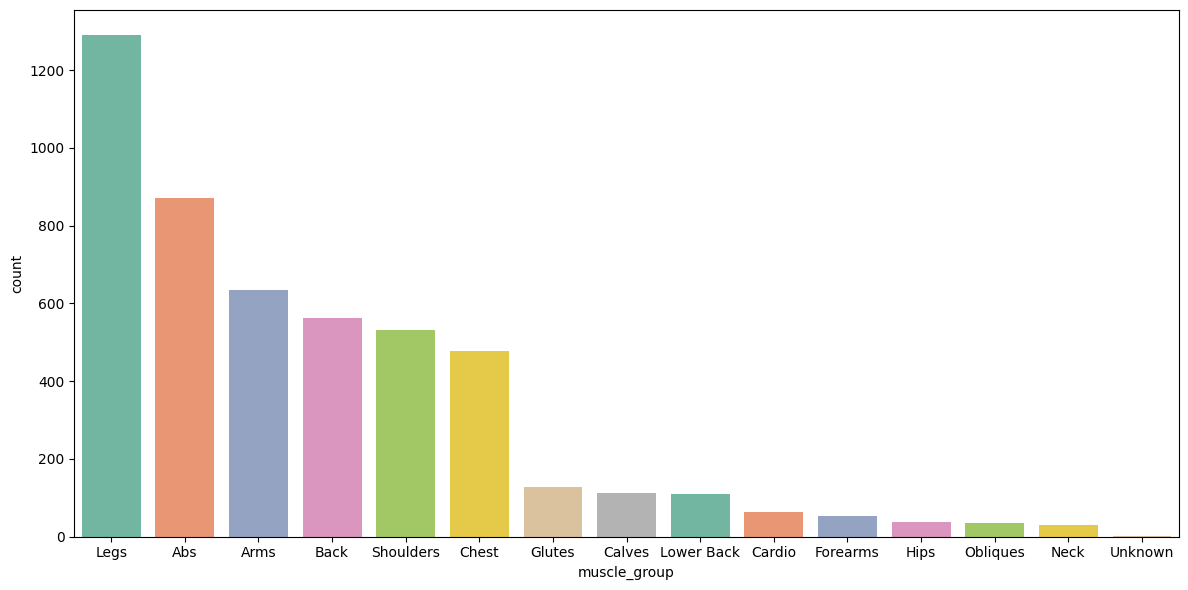

In [238]:
plt.figure(figsize=(12,6))  # increase the figure size
sns.barplot(x='muscle_group', y='count', data=mt_mg, palette="Set2")
plt.tight_layout()  # ensure the labels fit within the figure

In [211]:
# Creating a crosstab table for the 'body_group' column, counting occurrences for each unique value
mt_bg = pd.crosstab(index = all_workouts["body_group"],  # Make a crosstab
                              columns="count")      # Name the count column

mt_bg = mt_bg.sort_values(by='count', ascending=False)
mt_bg

col_0,count
body_group,
Upper Body,2203
Lower Body,1402
Core,871
Unknown,392
Cardio,63


In [215]:
# Calculating the proportions for each value in 'my_table' and rounding the results to two decimal places
(mt_bg/mt_bg.sum()).round(2)

col_0,count
body_group,
Upper Body,0.45
Lower Body,0.28
Core,0.18
Unknown,0.08
Cardio,0.01


In [239]:
mt_bg = mt_bg.reset_index()  # reset the index to make 'muscle_group' a column

C:\Users\dylan\AppData\Local\Temp\ipykernel_77700\1271045195.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='body_group', y='count', data=mt_bg, palette="Set2")


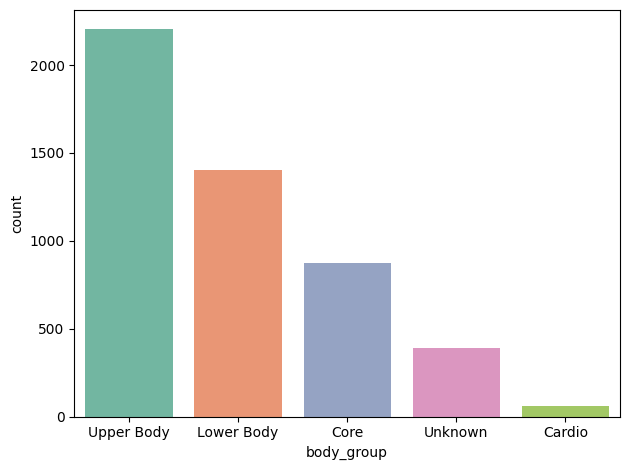

In [241]:
sns.barplot(x='body_group', y='count', data=mt_bg, palette="Set2")
plt.tight_layout()  # ensure the labels fit within the figure

In [210]:
# Creating a crosstab table for the 'force' column, counting occurrences for each unique value
mt_f = pd.crosstab(index = all_workouts["force"],  # Make a crosstab
                              columns="count")      # Name the count column

mt_f = mt_f.sort_values(by='count', ascending=False)
mt_f

col_0,count
force,
Push,2002
Unknown,1082
Hold,928
Pull,856
N/A,63


In [216]:
# Calculating the proportions
(mt_f/mt_f.sum()).round(2)

col_0,count
force,
Push,0.41
Unknown,0.22
Hold,0.19
Pull,0.17
N/A,0.01


In [242]:
mt_f = mt_f.reset_index()  # reset the index to make 'muscle_group' a column

C:\Users\dylan\AppData\Local\Temp\ipykernel_77700\3033159804.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='force', y='count', data=mt_f, palette="Set2")


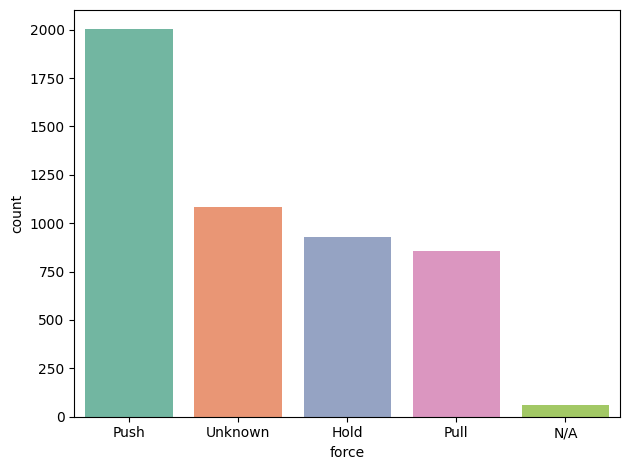

In [243]:
sns.barplot(x='force', y='count', data=mt_f, palette="Set2")
plt.tight_layout()  # ensure the labels fit within the figure

In [217]:
# Creating a crosstab table for the 'equipment' column, counting occurrences for each unique value
mt_e = pd.crosstab(index = all_workouts["equipment"],  # Make a crosstab
                              columns="count")      # Name the count column

mt_e = mt_e.sort_values(by='count', ascending=False)
mt_e

col_0,count
equipment,
Bodyweight,1788
Dumbbell,768
Barbell,446
Unavailable,392
Cable,258
Other,254
Kettlebell,222
Machine,187
Band,149


In [218]:
# Calculating the proportions
(mt_e/mt_e.sum()).round(2)

col_0,count
equipment,
Bodyweight,0.36
Dumbbell,0.16
Barbell,0.09
Unavailable,0.08
Cable,0.05
Other,0.05
Kettlebell,0.05
Machine,0.04
Band,0.03


In [244]:
mt_e = mt_e.reset_index()  # reset the index to make 'muscle_group' a column


C:\Users\dylan\AppData\Local\Temp\ipykernel_77700\3190848363.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='equipment', y='count', data=mt_e, palette="Set2")


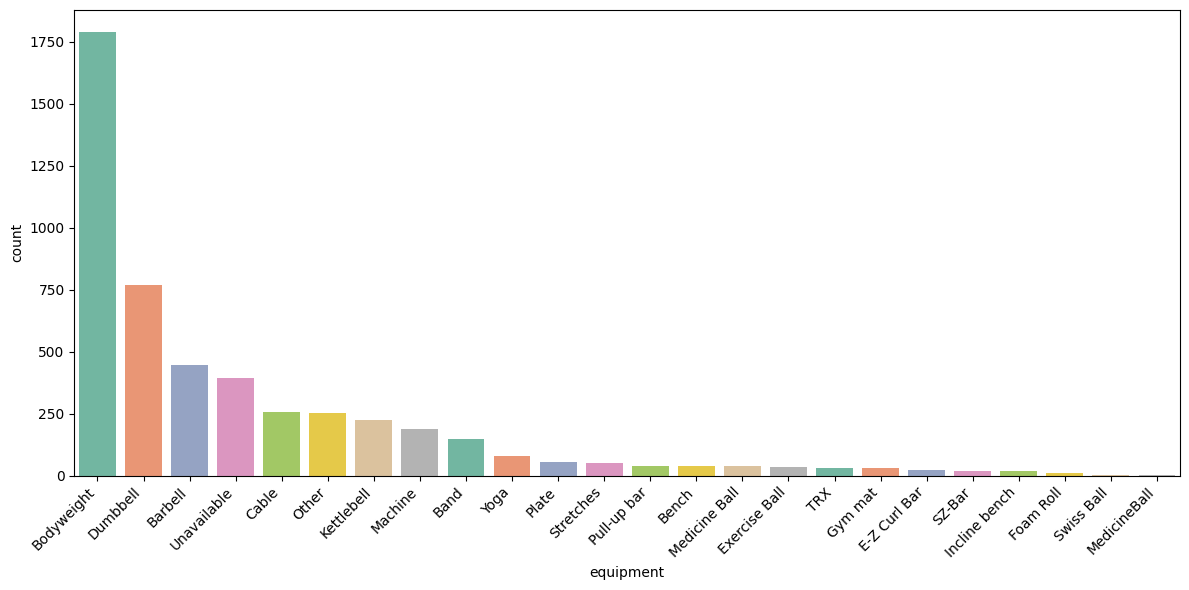

In [248]:
plt.figure(figsize=(12,6))  # increase the figure size
sns.barplot(x='equipment', y='count', data=mt_e, palette="Set2")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # ensure the labels fit within the figure

In [258]:
# Generating a crosstab for muscle_group & body_group
ct_mg_bg = pd.crosstab(all_workouts['muscle_group'], all_workouts['body_group'])

ct_mg_bg

body_group,Cardio,Core,Lower Body,Unknown,Upper Body
muscle_group,,,,,
Abs,0,871,0,0,0
Arms,0,0,0,0,633
Back,0,0,0,0,561
Calves,0,0,112,0,0
Cardio,63,0,0,0,0
Chest,0,0,0,0,478
Forearms,0,0,0,52,0
Glutes,0,0,0,127,0
Hips,0,0,0,38,0


<Axes: xlabel='body_group', ylabel='muscle_group'>

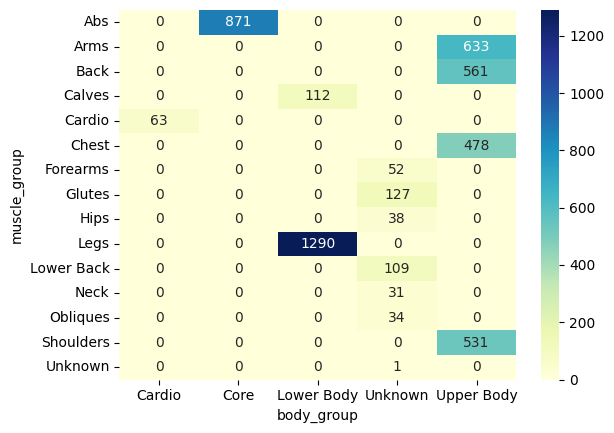

In [264]:
sns.heatmap(ct_mg_bg, annot=True, cmap="YlGnBu", fmt="d")

In [259]:
# Generating a crosstab for muscle_group & force
ct_mg_f = pd.crosstab(all_workouts['muscle_group'], all_workouts['force'])

ct_mg_f

force,Hold,N/A,Pull,Push,Unknown
muscle_group,,,,,
Abs,846,0,9,5,11
Arms,8,0,204,414,7
Back,10,0,418,0,133
Calves,3,0,0,102,7
Cardio,0,63,0,0,0
Chest,7,0,0,456,15
Forearms,6,0,35,0,11
Glutes,6,0,1,105,15
Hips,0,0,0,0,38


<Axes: xlabel='force', ylabel='muscle_group'>

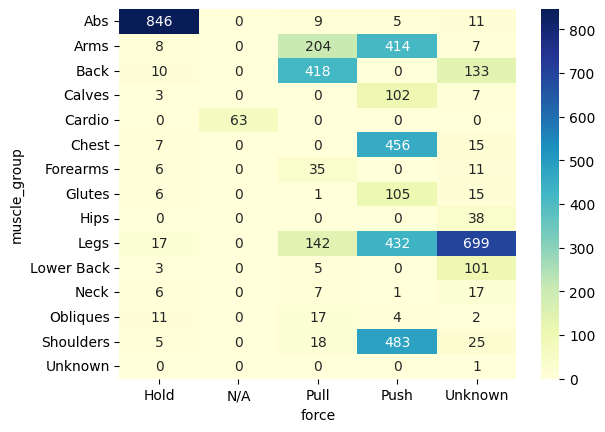

In [265]:
sns.heatmap(ct_mg_f, annot=True, cmap="YlGnBu", fmt="d")

In [260]:
# Generating a crosstab for muscle_group & equipment
ct_mg_e = pd.crosstab(all_workouts['muscle_group'], all_workouts['equipment'])

ct_mg_e

equipment,Band,Barbell,Bench,Bodyweight,Cable,Dumbbell,E-Z Curl Bar,Exercise Ball,Foam Roll,Gym mat,...,MedicineBall,Other,Plate,Pull-up bar,SZ-Bar,Stretches,Swiss Ball,TRX,Unavailable,Yoga
muscle_group,,,,,,,,,,,,,,,,,,,,,
Abs,9,15,0,518,32,63,0,21,0,25,...,0,61,4,14,0,4,2,7,42,2
Arms,24,62,9,138,80,170,17,0,1,0,...,0,14,7,0,13,8,0,4,49,9
Back,19,59,1,137,51,77,0,0,1,4,...,0,31,3,25,0,5,0,2,65,10
Calves,4,8,0,28,1,6,0,0,1,0,...,0,6,0,0,0,3,0,1,28,3
Cardio,0,0,0,45,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,17,0
Chest,18,38,9,160,27,91,2,3,0,0,...,0,17,2,1,0,4,0,2,43,7
Forearms,2,7,0,1,5,12,0,0,0,0,...,0,8,3,0,0,4,0,0,1,5
Glutes,8,12,0,60,6,16,0,2,1,0,...,0,1,2,0,0,3,0,1,0,6
Hips,3,0,0,27,0,0,0,0,2,0,...,0,2,0,0,0,0,0,0,2,0


<Axes: xlabel='equipment', ylabel='muscle_group'>

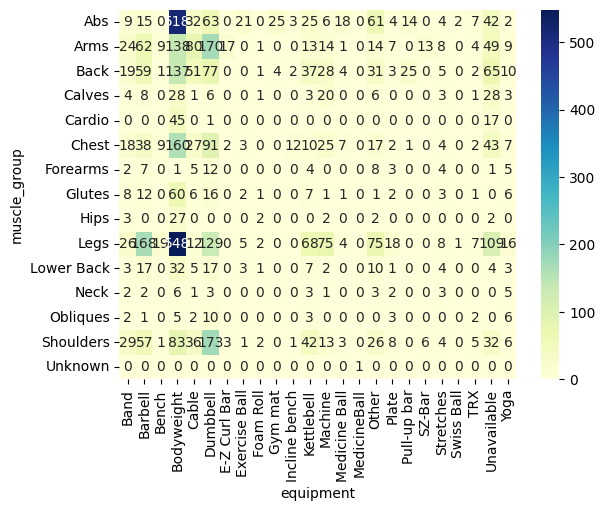

In [266]:
sns.heatmap(ct_mg_e, annot=True, cmap="YlGnBu", fmt="d")


In [261]:
# Generating a crosstab for body_group & force
ct_bg_f = pd.crosstab(all_workouts['body_group'], all_workouts['force'])

ct_bg_f

force,Hold,N/A,Pull,Push,Unknown
body_group,,,,,
Cardio,0,63,0,0,0
Core,846,0,9,5,11
Lower Body,20,0,142,534,706
Unknown,32,0,65,110,185
Upper Body,30,0,640,1353,180


<Axes: xlabel='force', ylabel='body_group'>

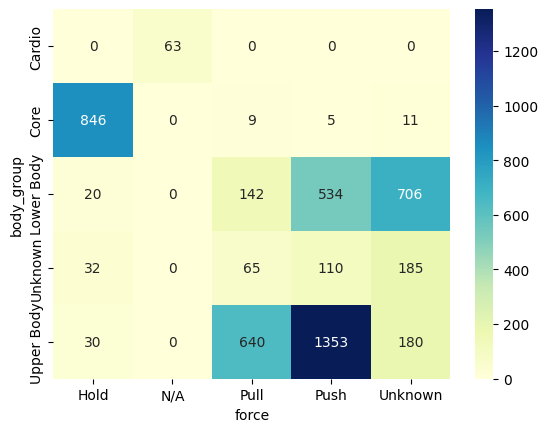

In [267]:
sns.heatmap(ct_bg_f, annot=True, cmap="YlGnBu", fmt="d")


In [262]:
# Generating a crosstab for equipment & body_group
ct_e_bg = pd.crosstab(all_workouts['equipment'], all_workouts['body_group'])

ct_e_bg

body_group,Cardio,Core,Lower Body,Unknown,Upper Body
equipment,,,,,
Band,0,9,30,20,90
Barbell,0,15,176,39,216
Bench,0,0,19,0,20
Bodyweight,45,518,576,131,518
Cable,0,32,13,19,194
Dumbbell,1,63,135,58,511
E-Z Curl Bar,0,0,0,0,22
Exercise Ball,0,21,5,5,4
Foam Roll,0,0,3,4,4


<Axes: xlabel='body_group', ylabel='equipment'>

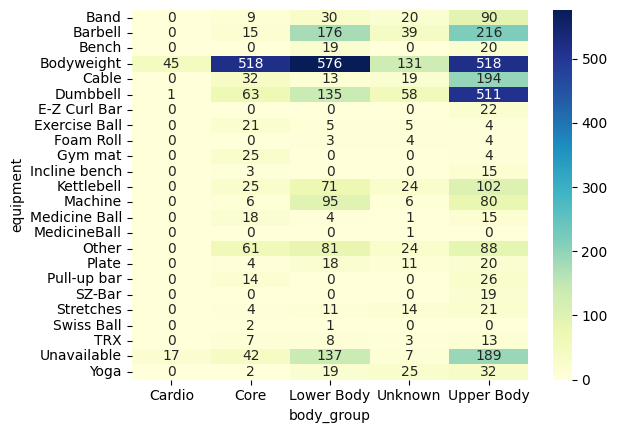

In [268]:
sns.heatmap(ct_e_bg, annot=True, cmap="YlGnBu", fmt="d")


In [263]:
# Generating a crosstab for equipment & force
ct_e_f = pd.crosstab(all_workouts['equipment'], all_workouts['force'])

ct_e_f

force,Hold,N/A,Pull,Push,Unknown
equipment,,,,,
Band,8,0,28,60,53
Barbell,13,0,107,203,123
Bench,0,0,1,38,0
Bodyweight,516,45,176,667,384
Cable,30,0,70,111,47
Dumbbell,61,1,180,390,136
E-Z Curl Bar,0,0,10,12,0
Exercise Ball,21,0,2,6,6
Foam Roll,0,0,3,4,4


<Axes: xlabel='force', ylabel='equipment'>

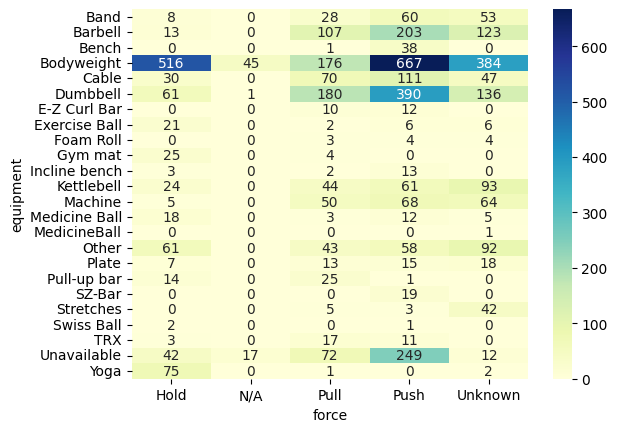

In [269]:
sns.heatmap(ct_e_f, annot=True, cmap="YlGnBu", fmt="d")
